In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score 
import seaborn as sns


In [5]:
df=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\diabetesanalysis\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [8]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
df.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [11]:
x=df.drop(['Outcome'],axis=1)
y=df.Outcome

In [12]:
print(f'x={x.shape}.y={y.shape}')

x=(768, 8).y=(768,)


###train test###


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)  #used to divide the data into training and testing sets ie diabetic and non dia

In [14]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [15]:
#raining the support vector Machine Classifier 
classifier = svm.SVC(kernel ='linear')

In [16]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

accuracy score

In [24]:
y_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(y_train_prediction,y_train)
print('Accuracy on Training Data = ', training_data_accuracy)

Accuracy on Training Data =  0.7833876221498371


In [25]:
y_test_prediction = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(y_test_prediction,y_test)
print('Accuracy on Testing Data = ', testing_data_accuracy)

Accuracy on Testing Data =  0.7727272727272727


In [17]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report

In [18]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

Text(0.5, 1.0, 'Confusion Matrix- svm Classifier ')

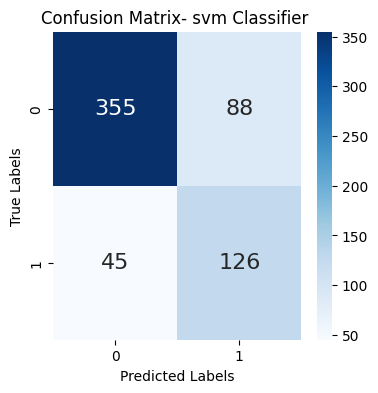

In [19]:
cm_train=confusion_matrix(x_train_prediction, y_train)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier ')

###save the trained model 

In [20]:
import pickle

In [22]:
filename = 'diabetes_model.sav'
pickle.dump(classifier,open(filename,"wb"))